## Gather Data from the uci machine learning repository

In [2]:
import requests
from lxml import html
#from urllib2.parse import urljoin this is a python 3 package
from os.path import basename
import xlrd
import xlwt
import pandas as pd
import urllib
import numpy as np


In [4]:
matplotlib inline

In [5]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
socket = urllib.urlopen(url)
abalone = pd.read_csv(socket,  header = None)

The first step is telling python where the location of the data is. Pandas I/O utilities are built on python's csv writer and such. they will automatically return a pandas object so it's very fast. read_csv will take any filepath, buff, url or object with a read method. 

#  Create summary statisics and graphs
In this we will get a feel for the data, it's completness and shape. turn any categorical variables into numbers. There are many ways to do this. I will show one and the rest in footnotes.Is this a well definied and complete data set? what is the right apporach for it? what is the correlation and causation prevelant to these?  Note the range is not large for any values so this data has already been normalized

In [6]:
abalone.describe()

,1,2,3,4,5,6,7,8
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
abalone.columns #this is a really useful command to know how to access your columns
# abalone[[0]] acces the element with this command

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

The first strategy will be using the pandas one- hot - encoding feature. This condsiders each category as it's own varaible then each attribute gets a mark if it has that category

In [8]:
# split the training set and the training targets
oheCat = pd.get_dummies(abalone[[0]])
#oheCat.describe()
#abalone.add(oheCat)
allcols = pd.concat((abalone,oheCat), axis = 1) #(append the ohe to the end of abalone )
abalone2 = allcols.drop(0 , 1) # drop the column with index 0 along the 1st axis, so by column 
abalone_target = abalone2.loc[:,8]
abalone_data = abalone2.drop(8,1)
# the data is now ready to enter a scikit learn module 

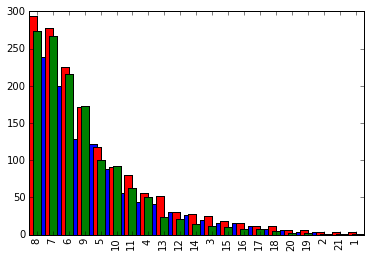

In [9]:
# get a comparison of the number of male, female and indepent to number of rings
f_counts = abalone.loc[abalone[0] == 'F', 8 ].value_counts() # value counts is a really cool function that tells you how many outputs are at a certain input
f_counts.plot('bar', position = 1.5 , label = 'Male', color = 'B')
m_counts = abalone.loc[abalone[0] == 'M', 8 ].value_counts()
m_counts.plot('bar' , position = 1 , label = 'Male', color = 'R')
I_counts = abalone.loc[abalone[0] == 'I', 8 ].value_counts()
I_counts.plot('bar' , position = 0.5 , label = 'Male', color = 'G')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcef4978e10>]], dtype=object)

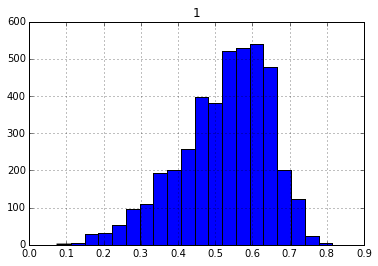

In [10]:
abalone[[1]].hist(bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcef466f290>]], dtype=object)

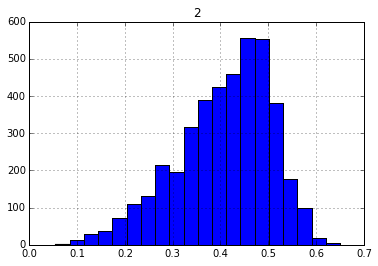

In [11]:
abalone[[2]].hist(bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcef461d690>]], dtype=object)

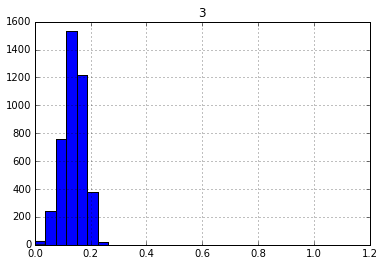

In [12]:
abalone[[3]].hist(bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcef446fd50>]], dtype=object)

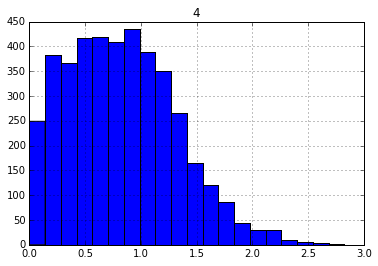

In [13]:
abalone[[4]].hist(bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcef439acd0>]], dtype=object)

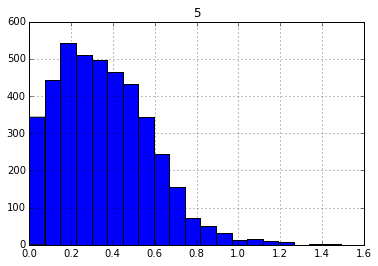

In [14]:
abalone[[5]].hist(bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcef42464d0>]], dtype=object)

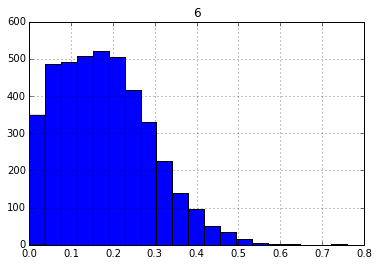

In [15]:
abalone[[6]].hist(bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcef41df350>]], dtype=object)

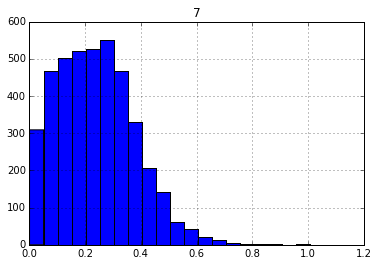

In [16]:
abalone[[7]].hist(bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcef4029210>]], dtype=object)

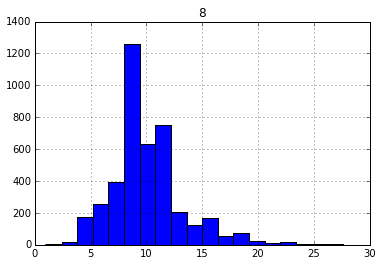

In [17]:
abalone[[8]].hist(bins = 20)

The next task is to make a covariance and correlation matrix for all the numerical values

In [18]:
abalone.cov() # here is the covaraince matrix

,1,2,3,4,5,6,7,8
1,0.014422,0.011761,0.004157,0.054491,0.023935,0.011887,0.015007,0.215562
2,0.011761,0.009849,0.003461,0.045038,0.019674,0.009787,0.012507,0.183872
3,0.004157,0.003461,0.001750,0.016803,0.007195,0.003660,0.004759,0.075179
4,0.054491,0.045038,0.016803,0.240481,0.105518,0.051946,0.065216,0.854409
5,0.023935,0.019674,0.007195,0.105518,0.049268,0.022675,0.027271,0.301204
6,0.011887,0.009787,0.003660,0.051946,0.022675,0.012015,0.013850,0.178057
7,0.015007,0.012507,0.004759,0.065216,0.027271,0.013850,0.019377,0.281663
8,0.215562,0.183872,0.075179,0.854409,0.301204,0.178057,0.281663,10.395266


In [19]:
abalone.corr() # here is the corelation matrix. provided by a pandas function 

,1,2,3,4,5,6,7,8
1,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
2,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
3,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
4,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
5,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
6,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
7,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
8,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


this matrix tell us that all varaibles are reasnobley correlated together. this implies this data set doesn't have one variable giong up while another goes down. Everything is reasnobley correlated together. this suggests that what ever causes the aging proceess also causes each marker to increase in some way 

Is the data sparse?



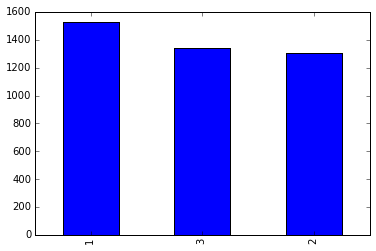

In [20]:
def fun(x):
    if x  == 'M':
        x = 1
    if x == 'F':
        x = 2
    if x == 'I':
        x = 3
    return x
gender = abalone.applymap(fun)[[0]] ## the apply map function take a function as an arguement that takes the value in each column one by one and does somethingto it then returns it
gender[0].value_counts().plot('bar')

# # The next section will be how to use sklearn to use a classifier. 
the main methodology will be to try out as many features of sklearn as possible to get an intuition for them

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

from sklearn.cross_validation import KFold
from sklearn.feature_selection import VarianceThreshold, SelectPercentile

In [22]:

clf = GaussianNB()
clf.fit(abalone_data, abalone_target).score(abalone_data,abalone_target)

0.1031841034235097

This is the most basic way to fir a model and get it's validation accuracy

In [23]:
X_train, X_test, y_train, y_test = train_test_split( abalone_data, abalone_target, test_size=0.33, random_state=42)
estimators = [('gnb', GaussianNB()) , ('KNC' , KNeighborsClassifier()) , ('SVC' ,  SVC()) , ('dec' , DecisionTreeClassifier()) , ('rfc' , RandomForestClassifier()) , ('ABC' , AdaBoostClassifier())
              ,('lr', LogisticRegressionCV()) , ('RC' , RidgeClassifierCV()) ]
param_grid = dict(comb_features__univ_select__k=[4,10] , comb_features__pca__n_components=[2,8])
for i in estimators:
    print(i)
    estimator= [i]
    clf = Pipeline(estimator)
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))
    grid_search = GridSearchCV(clf, param_grid=param_grid, verbose=10)
    grid_search.score(X_test)

('gnb', GaussianNB())
0.136330674402


AttributeError: 'GridSearchCV' object has no attribute 'scorer_'

These are all pretty low percentages. lets see if there's a way to improve them

I'll start by doing a grid search over a range of paramaters. this is mainly hyper paramater tuning and will probably not 
provide a substantial increase, but it's good to eastablish it 

Let's try to do some preprocessing and feature engineering on the data and then running the classifiers again
 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( abalone_data, abalone_target, test_size=0.33, random_state=42)
estimators = [('var' , VarianceThreshold(threshold = 0)) , ('gnb', GaussianNB()) ] # no improvment
estimators = [('var' , SelectPercentile()) , ('RC' , GaussianNB())] # improvment to27 % 

param_grid = dict(var__percentile=[0,25,50,75])


clf = Pipeline(estimators)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
grid_search = GridSearchCV(clf, param_grid=param_grid, verbose=10 , refit = True, cv = 2)


how are my learning curves, am i over fitting or under fitting. how is precision and recall 

In [ ]:
a = pd.DataFrame(abt)
a.columns = ['label']

In [24]:
grid_search.fit(abalone_data,a)

NameError: name 'a' is not defined

In [25]:
kf = KFold(3,n_folds=2)

In [26]:
kf

sklearn.cross_validation.KFold(n=3, n_folds=2, shuffle=False, random_state=None)

In [27]:
y_train = y_train.reshape(y_train.shape[0],1)

In [28]:
grid_search.fit(X_train,y_train2)

NameError: name 'y_train2' is not defined

In [29]:
type(y_train

numpy.ndarray

In [30]:
y_train2 = y_train.reshape((2798,1))

In [31]:
y = y_train2.resize(2798,1)

In [32]:
y_train.reshape((2798,1))

array([[ 8],
       [ 9],
       [17],
       ..., 
       [11],
       [ 9],
       [ 6]])

2798

4177